In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
inpath='/content/gdrive/My Drive/Brain'
output_path='/content/gdrive/My Drive'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
Fully1='/content/gdrive/My Drive/Brain/Volumesf1.npy'

Under1='/content/gdrive/My Drive/Brain/VolumesUnderf1.npy'

Fully2='/content/gdrive/My Drive/Brain/Volumesf2.npy'

Under2='/content/gdrive/My Drive/Brain/VolumesUnderf2.npy'

Fully3='/content/gdrive/My Drive/Brain/Volumesf3.npy'

Under3='/content/gdrive/My Drive/Brain/VolumesUnderf3.npy'

Fully4='/content/gdrive/My Drive/Brain/Volumesf4.npy'

Under4='/content/gdrive/My Drive/Brain/VolumesUnderf4.npy'

FullyS1=np.load(Fully1)
FullyS2=np.load(Fully2)
FullyS3=np.load(Fully3)
FullyS4=np.load(Fully4)
UnderS1=np.load(Under1)
UnderS2=np.load(Under2)
UnderS3=np.load(Under3)
UnderS4=np.load(Under4)

#UnderS3=np.load(Under3)
#Fully_Sampled= np.asarray(FullyS1)
#Undersampled= np.asarray(UnderS1)
Fully_Sampled=np.asarray( np.concatenate((FullyS1,FullyS1,FullyS1,FullyS1),axis=0))
Undersampled=np.asarray(np.concatenate((UnderS1,UnderS2,UnderS3,UnderS4),axis=0))

#from sklearn.model_selection import train_test_split
undersampled_train,undersampled_test,vol_val_train,vol_val_test = train_test_split(Undersampled,Fully_Sampled, test_size=0.2, random_state=0)
  
undersampled_train=undersampled_train.reshape(64,4,128,128,20)
undersampled_train=undersampled_train[:,:,:,:,0:1]
undersampled_train=undersampled_train.reshape(64,4,128,128)
vol_val_train=vol_val_train.reshape(64,4,128,128,20)
vol_val_train=vol_val_train[:,:,:,:,0:1]
vol_val_train=vol_val_train.reshape(64,4,128,128)
undersampled_test=undersampled_test.reshape(16,4,128,128,20)
undersampled_test=undersampled_test[:,:,:,:,0:1]
undersampled_test=undersampled_test.reshape(16,4,128,128)
vol_val_test=vol_val_test.reshape(16,4,128,128,20)
vol_val_test=vol_val_test[:,:,:,:,0:1]
vol_val_test=vol_val_test.reshape(16,4,128,128)








In [ ]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

inputs = Input(shape=(128, 128,4))

    
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(4, 1, activation = 'sigmoid')(conv9)

model = Model(input = inputs, output = conv10)

model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
undersampled_train = np.reshape(undersampled_train, (len(undersampled_train), 128, 128,4))  # adapt this if using `channels_first` image data format
undersampled_test = np.reshape(undersampled_test, (len(undersampled_test), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_train = np.reshape(vol_val_train, (len(vol_val_train), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_test = np.reshape(vol_val_test, (len(vol_val_test), 128, 128,4))    

    
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 128, 128, 64) 2368        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 128, 128, 64) 36928       conv2d_49[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 64, 64, 64)   0           conv2d_50[0][0]                  
____________________________________________________________________________________________

In [ ]:
from keras.callbacks import TensorBoard

model.fit(undersampled_train, vol_val_train,
                epochs=50,
                batch_size=1,
                shuffle=True,
                validation_data=(undersampled_test, vol_val_test))
#                callbacks=[TensorBoard(log_dir='/content/gdrive/My Drive/autoencoder')])

Train on 64 samples, validate on 16 samples
Epoch 1/50
64/64 [==============================] - 189s 3s/step - loss: 0.1850 - acc: 0.4851 - val_loss: 0.1095 - val_acc: 0.5102
Epoch 2/50
64/64 [==============================] - 183s 3s/step - loss: 0.0935 - acc: 0.5141 - val_loss: 0.0976 - val_acc: 0.5157
Epoch 3/50
64/64 [==============================] - 189s 3s/step - loss: 0.0847 - acc: 0.5172 - val_loss: 0.0852 - val_acc: 0.5162
Epoch 4/50
64/64 [==============================] - 190s 3s/step - loss: 0.0799 - acc: 0.5174 - val_loss: 0.0776 - val_acc: 0.5178
Epoch 5/50
64/64 [==============================] - 186s 3s/step - loss: 0.0778 - acc: 0.5177 - val_loss: 0.0777 - val_acc: 0.5178
Epoch 6/50
64/64 [==============================] - 184s 3s/step - loss: 0.0770 - acc: 0.5178 - val_loss: 0.0775 - val_acc: 0.5176
Epoch 7/50
64/64 [==============================] - 182s 3s/step - loss: 0.0762 - acc: 0.5180 - val_loss: 0.0763 - val_acc: 0.5183
Epoch 8/50
64/64 [=====================

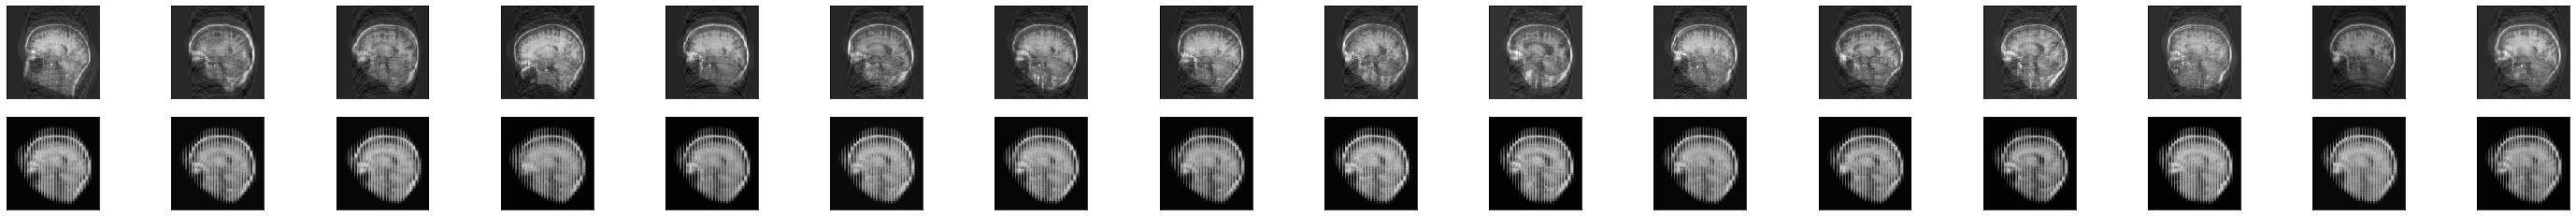

In [ ]:
import matplotlib.pyplot as plt
import pywt
decoded_imgs = model.predict(undersampled_test)

def idwav(imgs):
    imagepred=[]
    for imagef in imgs:
        imagef=imagef.reshape(4,128,128)
        c1,c2,c3,c4= np.array_split(imagef, 4,axis=0)
    
    
        coeffs1=c1,(c2,c3,c4)
        imageff=pywt.idwt2(coeffs1, 'haar')
        
        imageff=imageff.reshape(256,256)
        imagepred.append(imageff)
    imagepred=np.asarray(imagepred,dtype=np.float64)
    return imagepred
  
undersampled_test_input=idwav(undersampled_test)
imagepred=idwav(decoded_imgs)



n = 16
plt.figure(figsize=(50, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(undersampled_test_input[i])##################printing test input
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +n+1)
    plt.imshow(imagepred[i].reshape(256, 256))#######################printing prediction
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
original_images=idwav(vol_val_test)#######fully test images


from skimage.measure import compare_ssim as ssim

for im1,im2 in zip(original_images,imagepred):
    ssim_const = ssim(im1,im2)
                
    print(ssim_const)
      

0.7233788070733459
0.7633655392818527
0.740828348151145
0.7021291524222326
0.7504009267611338
0.7188363480914298
0.7421126705042459
0.7150838451152897
0.7128654028811715
0.7345778088110841
0.7186785385940048
0.7512529406344374
0.7464460068078914
0.7397259248977613
0.7535026515651762
0.7328403381830821
